In [1]:
import pandas as pd
import numpy as np
from bokeh.io import  show, output_notebook 


from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from math import pi

import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('C:\\Users\\Acer\\Downloads\\Supply and Chain problem.csv')

In [3]:
def supply_copy(df):
    df = df.copy()
  
    return df


In [4]:
x = supply_copy(df)

In [5]:
x.columns

Index(['Unnamed: 0', 'Order ID', 'Order Date', 'Port of Origin', 'Transporter',
       'Throughput time', 'Service Level', 'Day count for shipping ahead',
       'Ship Late Day count', 'Consumer', 'Product ID',
       'Plant Identification Code', 'Port of Destination',
       'The number of units', 'Weight'],
      dtype='object')

In [6]:
x.drop(['Unnamed: 0'], axis=1, inplace = True)

In [7]:
x.columns

Index(['Order ID', 'Order Date', 'Port of Origin', 'Transporter',
       'Throughput time', 'Service Level', 'Day count for shipping ahead',
       'Ship Late Day count', 'Consumer', 'Product ID',
       'Plant Identification Code', 'Port of Destination',
       'The number of units', 'Weight'],
      dtype='object')

In [8]:
x.isna().sum()

Order ID                        0
Order Date                      0
Port of Origin                  0
Transporter                     0
Throughput time                 0
Service Level                   0
Day count for shipping ahead    0
Ship Late Day count             0
Consumer                        0
Product ID                      0
Plant Identification Code       0
Port of Destination             0
The number of units             0
Weight                          0
dtype: int64

In [9]:

x.rename(columns = {'Plant Identification Code': 'PIC'}, inplace = True)


In [10]:
x.head()

,Order ID,Order Date,Port of Origin,Transporter,Throughput time,Service Level,Day count for shipping ahead,Ship Late Day count,Consumer,Product ID,PIC,Port of Destination,The number of units,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [14]:
values_to_count = x['Throughput time'].unique()

day_counts = {}

for value in values_to_count:
    day_count = x[x['Throughput time'] == value].shape[0]
    day_counts[f'day_counts_{value}'] = day_count

for key, value in day_counts.items():
    print(f'{key}: {value}')



day_counts_1: 2123
day_counts_4: 143
day_counts_0: 411
day_counts_2: 6480
day_counts_3: 58


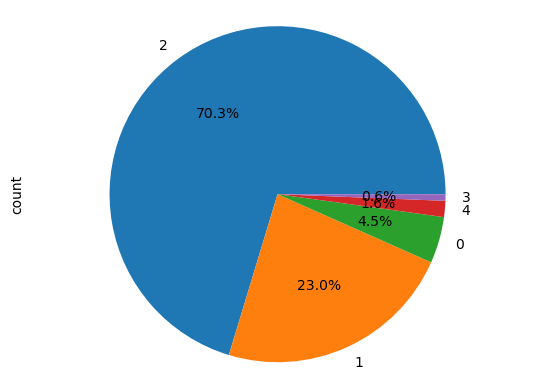

In [15]:
values_to_count = x['Throughput time'].value_counts()

values_to_count.plot(kind = 'pie', autopct = '%1.1f%%')
plt.axis('equal') 
plt.show()

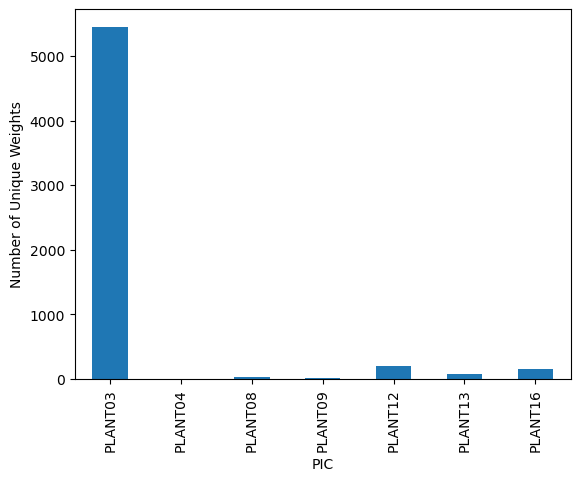

In [13]:
grouped_data = x.groupby('PIC')['Weight'].nunique()
grouped_data.plot(kind = 'bar')
plt.xlabel('PIC')  
plt.ylabel('Number of Unique Weights')
plt.show()